In [2]:
# 1) Kütüphaneleri İçe Aktarma
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score



In [ ]:
# 2) Veri Hazırlığı: AND, OR, NOT
X_2 = np.array([[0,0],[0,1],[1,0],[1,1]])
y_and = np.array([0,0,0,1])
y_or  = np.array([0,1,1,1])

X_not = np.array([[0],[1]])
y_not = np.array([1,0])  # NOT: 0->1, 1->0

# Bias sütunu ekleme fonksiyonu
def add_bias(X):
    return np.hstack([np.ones((X.shape[0],1)), X])

X2_b = add_bias(X_2)  # shape (4,3): [bias, x1, x2]
Xnot_b = add_bias(X_not)  # shape (2,2): [bias, x]


In [4]:
# 3) Genel Perceptron İşlevleri

def net_output(w, x):
    return np.dot(x, w)

def accuracy(y_true, y_pred):
    return accuracy_score(y_true, y_pred)


In [5]:
# 4) Signum Aktivasyonlu Perceptron Sınıfı
class SignumPerceptron:
    def __init__(self, input_dim, eta=0.1):
        # input_dim includes bias term dimension
        self.w = np.zeros(input_dim)
        self.eta = eta

    def activation(self, net):
        # signum -> return 0 or 1
        return (net > 0).astype(int)

    def predict(self, X):
        net = net_output(self.w, X)
        return self.activation(net)

    def fit(self, X, y, epochs=20, verbose=False):
        history = {'acc': []}
        for ep in range(epochs):
            # iterate samples (online perceptron)
            for xi, ti in zip(X, y):
                net = np.dot(xi, self.w)
                yi = 1 if net>0 else 0
                error = ti - yi
                # perceptron learning rule
                self.w += self.eta * error * xi
            preds = self.predict(X)
            acc = accuracy(y, preds)
            history['acc'].append(acc)
            if verbose:
                print(f"Epoch {ep+1}/{epochs} acc={acc:.3f}")
        return history


In [ ]:
# 5) Sigmoid Aktivasyonlu  Perceptron Sınıfı
class SigmoidPerceptron:
    def __init__(self, input_dim, eta=0.1):
        self.w = np.zeros(input_dim)
        self.eta = eta

    def sigmoid(self, net):
        return 1.0 / (1.0 + np.exp(-net))

    def predict_proba(self, X):
        net = net_output(self.w, X)
        return self.sigmoid(net)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

    def fit(self, X, y, epochs=200, verbose=False):
        history = {'acc': [], 'loss': []}
        for ep in range(epochs):
            # batch gradient descent update
            y_pred = self.predict_proba(X)
            # delta rule using derivative y(1-y)
            error = y - y_pred
            grad = np.dot(X.T, error * y_pred * (1 - y_pred))
            self.w += self.eta * grad

            preds = (y_pred >= 0.5).astype(int)
            acc = accuracy(y, preds)
            # binary cross-entropy loss (numerically stable)
            eps = 1e-12
            loss = -np.mean(y * np.log(y_pred+eps) + (1-y) * np.log(1-y_pred+eps))
            history['acc'].append(acc)
            history['loss'].append(loss)
            if verbose and (ep % 50 == 0 or ep==epochs-1):
                print(f"Epoch {ep+1}/{epochs} acc={acc:.3f} loss={loss:.4f}")
        return history


In [7]:
# 6) Eğitim Döngüsü ve Yardımcı Fonksiyonlar

def train_and_plot(model_class, X, y, eta=0.1, epochs=100, title=''):
    model = model_class(X.shape[1], eta=eta)
    history = model.fit(X, y, epochs=epochs)
    # plotting
    fig, ax = plt.subplots(1,1, figsize=(6,4))
    if 'loss' in history:
        ax.plot(history['loss'], label='loss')
        ax.set_ylabel('loss')
        ax2 = ax.twinx()
        ax2.plot(history['acc'], color='tab:orange', label='acc')
        ax2.set_ylabel('acc')
    else:
        ax.plot(history['acc'], label='acc')

    ax.set_xlabel('epoch')
    ax.set_title(title)
    ax.grid(True)
    ax.legend(loc='best')
    plt.show()

    preds = model.predict(X)
    print('Final accuracy:', accuracy(y, preds))
    print('Final weights:', model.w)
    return model, history


--- AND: Signum ---


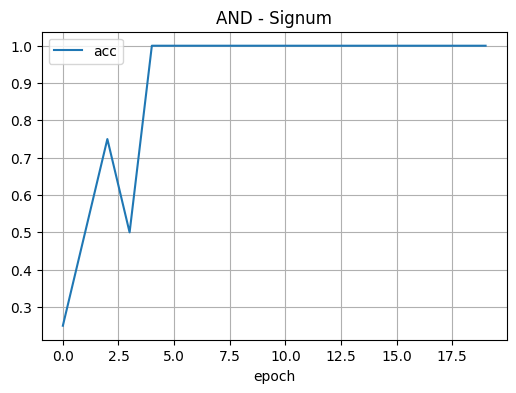

Final accuracy: 1.0
Final weights: [-0.2  0.2  0.1]

--- AND: Sigmoid ---


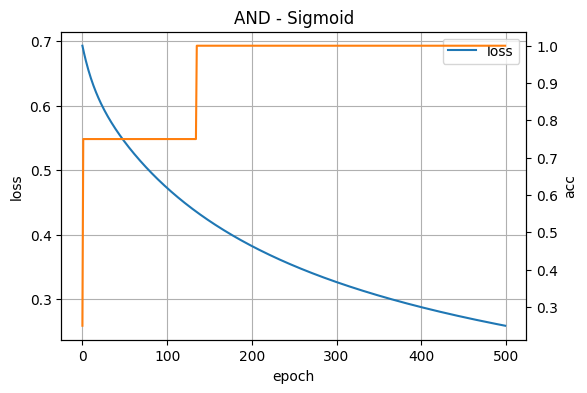

Final accuracy: 1.0
Final weights: [-2.87948424  1.8141849   1.8141849 ]


In [8]:
# 7) Eğitim: AND için Signum ve Sigmoid Karşılaştırması
print('--- AND: Signum ---')
model_s, hist_s = train_and_plot(SignumPerceptron, X2_b, y_and, eta=0.1, epochs=20, title='AND - Signum')

print('\n--- AND: Sigmoid ---')
model_sig, hist_sig = train_and_plot(SigmoidPerceptron, X2_b, y_and, eta=0.1, epochs=500, title='AND - Sigmoid')


--- OR: Signum ---


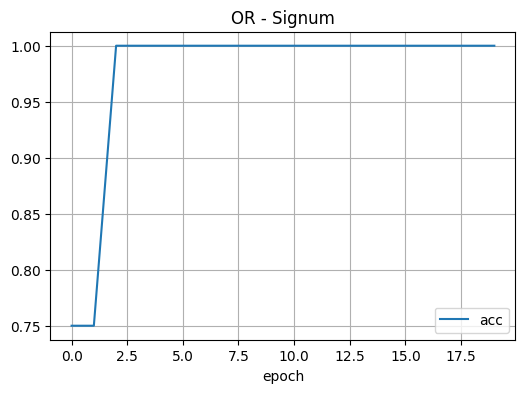

Final accuracy: 1.0
Final weights: [0.  0.1 0.1]

--- OR: Sigmoid ---


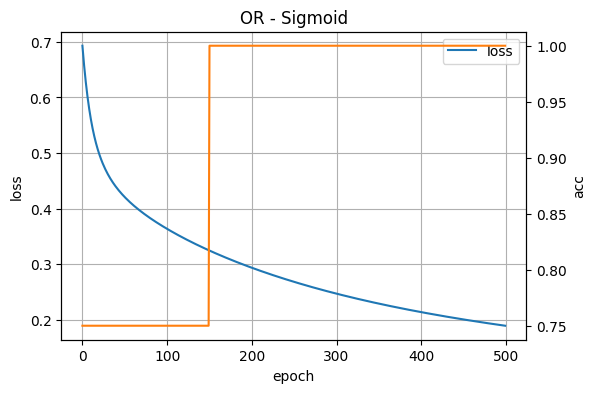

Final accuracy: 1.0
Final weights: [-0.8324069   2.40521828  2.40521828]


In [9]:
# 8) Eğitim: OR için Signum ve Sigmoid Karşılaştırması
print('--- OR: Signum ---')
model_s_or, hist_s_or = train_and_plot(SignumPerceptron, X2_b, y_or, eta=0.1, epochs=20, title='OR - Signum')

print('\n--- OR: Sigmoid ---')
model_sig_or, hist_sig_or = train_and_plot(SigmoidPerceptron, X2_b, y_or, eta=0.1, epochs=500, title='OR - Sigmoid')


--- NOT: Signum ---


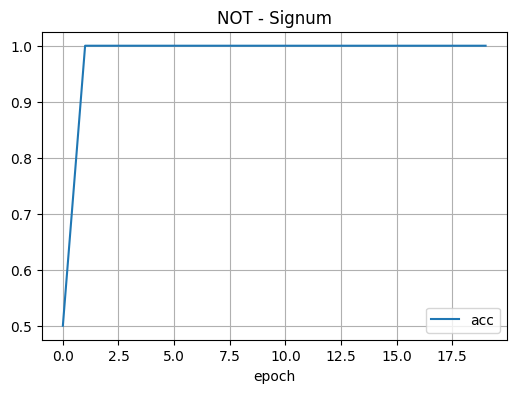

Final accuracy: 1.0
Final weights: [ 0.1 -0.1]

--- NOT: Sigmoid ---


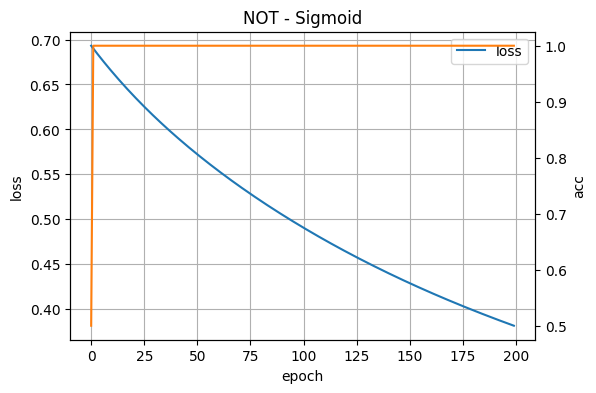

Final accuracy: 1.0
Final weights: [ 0.57461976 -1.56936468]


In [10]:
# 9) Eğitim: NOT için Signum ve Sigmoid Karşılaştırması
print('--- NOT: Signum ---')
model_s_not, hist_s_not = train_and_plot(SignumPerceptron, Xnot_b, y_not, eta=0.1, epochs=20, title='NOT - Signum')

print('\n--- NOT: Sigmoid ---')
model_sig_not, hist_sig_not = train_and_plot(SigmoidPerceptron, Xnot_b, y_not, eta=0.1, epochs=200, title='NOT - Sigmoid')


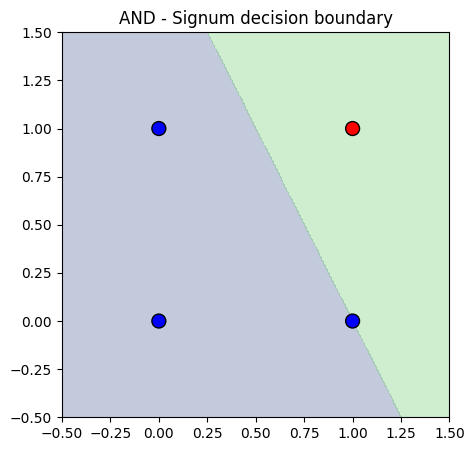

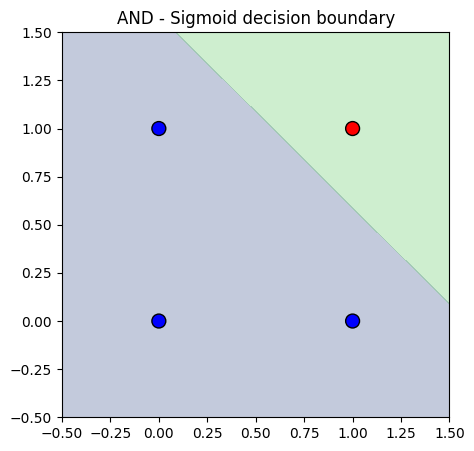

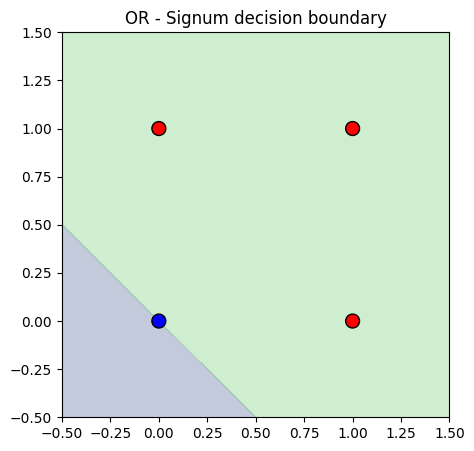

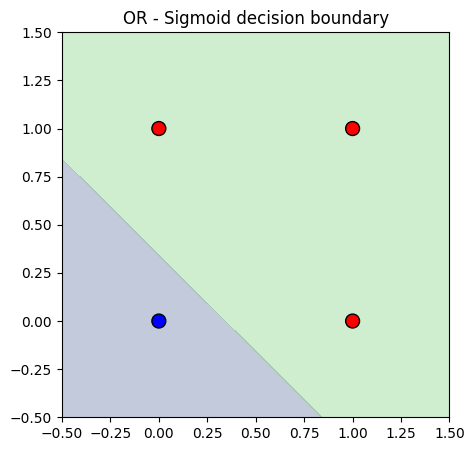

In [11]:
# 10) Görselleştirme: 2D Karar Sınırı (AND/OR)

def plot_decision_boundary(model, X, y, title='Decision boundary'):
    # only for 2D features (bias included)
    # X is with bias column
    xx = np.linspace(-0.5,1.5,200)
    yy = np.linspace(-0.5,1.5,200)
    XX, YY = np.meshgrid(xx, yy)
    grid = np.c_[np.ones(XX.ravel().shape), XX.ravel(), YY.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(XX.shape)
    plt.figure(figsize=(5,5))
    plt.contourf(XX, YY, Z, alpha=0.3, levels=[-0.5,0.5,1.5])
    # plot points
    plt.scatter(X[:,1], X[:,2], c=y, s=100, cmap='bwr', edgecolor='k')
    plt.title(title)
    plt.xlim(-0.5,1.5); plt.ylim(-0.5,1.5)
    plt.show()

# Example plots
plot_decision_boundary(model_s, X2_b, y_and, title='AND - Signum decision boundary')
plot_decision_boundary(model_sig, X2_b, y_and, title='AND - Sigmoid decision boundary')
plot_decision_boundary(model_s_or, X2_b, y_or, title='OR - Signum decision boundary')
plot_decision_boundary(model_sig_or, X2_b, y_or, title='OR - Sigmoid decision boundary')
